## SQL Alchemy Challenge

## Objective

Planning a long holiday vacation in Honolulu, Hawaii. To help with my trip planning, I did some climate analysis on the area.  By accessing weather Hawaii weather data from a number of weather stations, I will be able to get names of stations, precipitation, temperature, latitutude, and longitude data. 

## Observation Analysis on the following:

* Precipitation 
* Station
* Temperature
* Daily Rainfall Average

### Libraries, Databases, Apps:

* Flask, Matplotlib, NumPy, Pandas, Datetime, SQLAlchemy, SciPy
* SQLite
* VSCode (app.py)

Libraries

In [21]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect
from sqlalchemy import distinct

#t-tests
import scipy.stats as stats

# Reflect Tables into SQLAlchemy ORM

In [3]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

----

Get Column information from tables for class. (Not used for data. Only for viewing table columns in db)

In [4]:
# Use the Inspector to explore the database and print the table names
# inspector = inspect(engine)
# inspector.get_table_names()

In [5]:
# Use Inspector to print the column names and types
# columns = inspector.get_columns('measurement')
# for c in columns:
#     print(c['name'], c["type"])

In [6]:
# Use Inspector to print the column names and types
# columns = inspector.get_columns('station')
# for c in columns:
#     print(c['name'], c["type"])

In [7]:
# # Sets an object to utilize the default declarative base in SQL Alchemy
# Base = declarative_base()

# # Creates Classes which will serve as the anchor points for our Tables
# class Measurement(Base):
#     __tablename__ = 'measurement'
#     id = Column(Integer, primary_key=True)
#     station  = Column(String(30))
#     date = Column(String(30))
#     prcp = Column(Float)
#     tobs = Column(Float)


# class Station(Base):
#     __tablename__ = 'station'
#     id = Column(Integer, primary_key=True)
#     station  = Column(String(60))
#     name = Column(String(50))
#     latitude = Column(Float)
#     longitude = Column(Float)
#     elevation = Column(Float)

----

### Reflect an existing database into a new model

In [8]:
# Reflect Database into ORM class
# Declare a Base using `automap_base()`
# B in Base needs to be capitalized because its a CLASS
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

### Reflect the tables

We can view all of the classes that automap found


In [9]:
# reflect the tables
# We can view all of the classes that automap found
# Return the database tables by using keys
db_keys = Base.classes.keys()
db_keys

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
# ----------------------------------
# Session is a temporary binding to our DB
# Session is the messenger-- allows to 'walk through the door'
session = Session(bind=engine)

----

# Exploratory Climate Analysis
Design a query to retrieve the last 12 months of precipitation data and plot the results.

#### Calculate the date 1 year ago from the last data point in the database

In [12]:
# Obtain latest date recorded in percipitation table
latest_date = (session.query(Measurement.date)
               .order_by(Measurement.date.desc()).first())
latest_date

('2017-08-23')

#### Perform a query to retrieve the data and precipitation scores

In [13]:

# Query for the measurements
# select all columns in table
sel = [Measurement.date, 
       Measurement.prcp]

precipitation = (session.query(*sel)
    .filter(Measurement.date > '2016-08-23')
                 .order_by(Measurement.date.desc())
                 .all())
precipitation

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

## **Create a DataFrame from the results & plot the results**

Save the query results as a Pandas DataFrame and set the index to the date column

In [14]:
# Create dataframe
df_precipitation = pd.DataFrame(precipitation, columns=['date', 'prcp'])

# Drop all nan and empty values
df_precipitation = df_precipitation.dropna()

#### Sort the dataframe by date

In [15]:
# Assign 'date' DateTimeIndex. Allows for date searching throug index.
df_precipitation['date']=pd.DatetimeIndex(df_precipitation['date'])

#Set index to 'date'
df_precipitation = df_precipitation.set_index('date').sort_index(ascending=True)

In [16]:
# Copy of clean data
df_precipitation_clean = df_precipitation.copy()

#### Use Pandas Plotting with Matplotlib to plot the data

In [17]:
df_precipitation_clean.index[-1]

Timestamp('2017-08-23 00:00:00')

In [18]:
datemin = np.datetime64(df_precipitation_clean.index[0], 'D')
datemax = np.datetime64(df_precipitation_clean.index[-1], 'Y') + np.timedelta64(1, 'D')


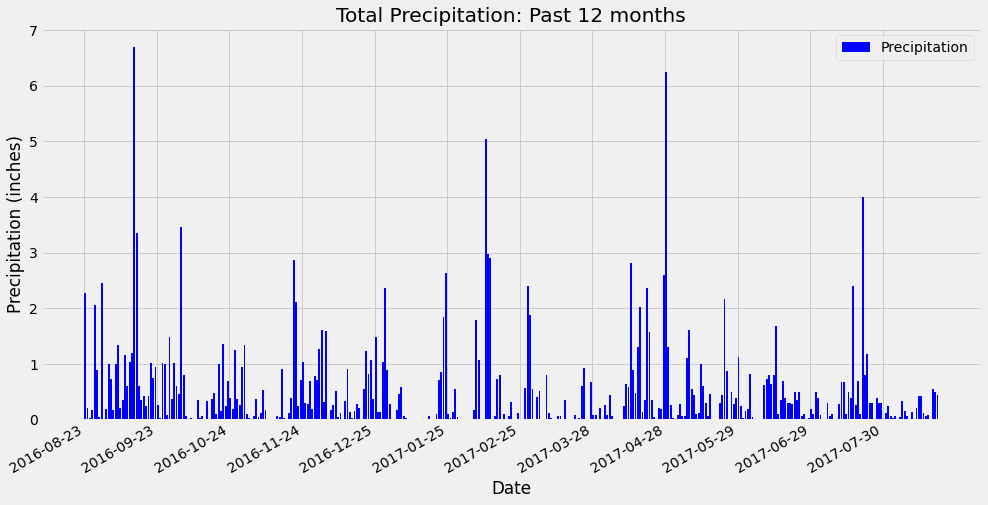

In [25]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(15, 8))

month_fmt = mdates.DateFormatter("%Y-%m-%d")


# Add x-axis and y-axis
ax.bar(df_precipitation_clean.index,
       df_precipitation_clean['prcp'],
       color='blue',
       label='Precipitation')


# Set datetime min max numpy array
datemin = np.datetime64(df_precipitation_clean.index[0], 'D')
datemax = np.datetime64(df_precipitation_clean.index[-1], 'Y') 

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Total Precipitation: Past 12 months")



# format the ticks
ax.xaxis.set_major_formatter(month_fmt)
ax.xlim=(datemin, datemax)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=31, offset=0))


# format xaxis with 4 month intervals
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")


#Call legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)


fig.autofmt_xdate()

plt.show()

In [26]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary = df_precipitation_clean.describe()
summary

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


----

----

In [27]:
# Design a query to show how many stations are available in this dataset?
station_count = (session.query(Station.id)
               .filter(Station.id).count())
station_count

9

#### What are the most active stations? (i.e. what stations have the most rows)?
#### List the stations and the counts in descending order.


In [28]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
measurement_count_list = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
measurement_count_list

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

**with names**

In [29]:

columns = [Measurement.station, func.count(Measurement.station), Station.name]
most_active_stations_list = session.query(*columns).filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).statement
session.query(*columns).filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# for record in most_active_stations_list:
#     (ms, fmn, ss, sn) = record
#     print(ms, fmn, ss, sn)

[('USC00519281', 2772, 'WAIHEE 837.5, HI US'),
 ('USC00519397', 2724, 'WAIKIKI 717.2, HI US'),
 ('USC00513117', 2709, 'KANEOHE 838.1, HI US'),
 ('USC00519523', 2669, 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('USC00516128', 2612, 'MANOA LYON ARBO 785.2, HI US'),
 ('USC00514830', 2202, 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('USC00511918', 1979, 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00517948', 1372, 'PEARL CITY, HI US'),
 ('USC00518838', 511, 'UPPER WAHIAWA 874.3, HI US')]

**in a dataframe**

In [30]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# DataFrame displaying list created
Measurements_df_counts = pd.read_sql_query(most_active_stations_list, session.bind)
Measurements_df_counts

,station,count_1,name
0,USC00519281,2772,"WAIHEE 837.5, HI US"
1,USC00519397,2724,"WAIKIKI 717.2, HI US"
2,USC00513117,2709,"KANEOHE 838.1, HI US"
3,USC00519523,2669,"WAIMANALO EXPERIMENTAL FARM, HI US"
4,USC00516128,2612,"MANOA LYON ARBO 785.2, HI US"
5,USC00514830,2202,"KUALOA RANCH HEADQUARTERS 886.9, HI US"
6,USC00511918,1979,"HONOLULU OBSERVATORY 702.2, HI US"
7,USC00517948,1372,"PEARL CITY, HI US"
8,USC00518838,511,"UPPER WAHIAWA 874.3, HI US"


### Which station has the highest number of observations?

In [31]:
Highest_observation = session.query(*columns).filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
Highest_observation

('USC00519281', 2772, 'WAIHEE 837.5, HI US')

Calculate the lowest temperature recorded, highest temperature recorded, and average temperature of the most active station

In [32]:
# Using the station id from the previous query, 
# calculate the lowest temperature recorded, 
measurement_lowest_temp = session.query(Measurement.station, func.min(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
print('--- Measurement: Lowest Temp ---')
print('Station, Lowest Temp')
print(measurement_lowest_temp)


# highest temperature recorded, 
measurement_highest_temp = session.query(Measurement.station, func.max(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
print('--- Measurement: Highest Temp ---')
print('Station, Highest Temp')
print(measurement_highest_temp)


# and average temperature of the most active station?
columns = [Measurement.station, func.count(Measurement.station), func.avg(Measurement.tobs), Station.name]
measurement_avg_temp = session.query(*columns).filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
print('--- Measurement: Avg Temp of Highest Counted Station ---')
print('Station, Count, Avg Temp, Name of Station')
print(measurement_avg_temp)
print(f'Specifically: {measurement_avg_temp[2]}')

--- Measurement: Lowest Temp ---
Station, Lowest Temp
('USC00519281', 54.0)
--- Measurement: Highest Temp ---
Station, Highest Temp
('USC00519281', 85.0)
--- Measurement: Avg Temp of Highest Counted Station ---
Station, Count, Avg Temp, Name of Station
('USC00519281', 2772, 71.66378066378067, 'WAIHEE 837.5, HI US')
Specifically: 71.66378066378067


**Which station has the highest number of observations?**

In [33]:
columns = [Measurement.station, func.count(Measurement.tobs), Station.name]
measurement_avg_temp = session.query(*columns).filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
measurement_avg_temp

('USC00519281', 2772, 'WAIHEE 837.5, HI US')

**Filter by the station with the highest number of observations.**

In [34]:
columns = [Measurement.station, func.count(Measurement.station), Station.name]
most_active_stations_list = session.query(*columns).filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).statement
session.query(*columns).filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772, 'WAIHEE 837.5, HI US'),
 ('USC00519397', 2724, 'WAIKIKI 717.2, HI US'),
 ('USC00513117', 2709, 'KANEOHE 838.1, HI US'),
 ('USC00519523', 2669, 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('USC00516128', 2612, 'MANOA LYON ARBO 785.2, HI US'),
 ('USC00514830', 2202, 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('USC00511918', 1979, 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00517948', 1372, 'PEARL CITY, HI US'),
 ('USC00518838', 511, 'UPPER WAHIAWA 874.3, HI US')]

**Choose the station with the highest number of temperature observations.**

-----

In [35]:
Highest_observation = session.query(Measurement.station).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
Highest_observation

('USC00519281')

In [36]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
print('---- Last 12 months of Temp Obs data for station with highest count of Temps ----')
columns = [Measurement.date, Measurement.station, Measurement.tobs]
meas_highest_tobs_12_months_df_call = session.query(*columns).filter(Measurement.date > '2016-08-23').filter(Measurement.station == 'USC00519281').order_by(Measurement.date.desc()).statement

meas_highest_tobs_12_months = (session.query(*columns)
                 .filter(Measurement.date > '2016-08-23')
                 .filter(Measurement.station == 'USC00519281')
                 .order_by(Measurement.date.desc()).all())
meas_highest_tobs_12_months

---- Last 12 months of Temp Obs data for station with highest count of Temps ----


[('2017-08-18', 'USC00519281', 79.0),
 ('2017-08-17', 'USC00519281', 76.0),
 ('2017-08-16', 'USC00519281', 76.0),
 ('2017-08-15', 'USC00519281', 77.0),
 ('2017-08-14', 'USC00519281', 77.0),
 ('2017-08-13', 'USC00519281', 77.0),
 ('2017-08-06', 'USC00519281', 83.0),
 ('2017-08-05', 'USC00519281', 82.0),
 ('2017-08-04', 'USC00519281', 77.0),
 ('2017-07-31', 'USC00519281', 76.0),
 ('2017-07-30', 'USC00519281', 81.0),
 ('2017-07-29', 'USC00519281', 82.0),
 ('2017-07-28', 'USC00519281', 81.0),
 ('2017-07-27', 'USC00519281', 76.0),
 ('2017-07-26', 'USC00519281', 75.0),
 ('2017-07-25', 'USC00519281', 77.0),
 ('2017-07-24', 'USC00519281', 75.0),
 ('2017-07-23', 'USC00519281', 82.0),
 ('2017-07-22', 'USC00519281', 77.0),
 ('2017-07-21', 'USC00519281', 77.0),
 ('2017-07-20', 'USC00519281', 77.0),
 ('2017-07-19', 'USC00519281', 76.0),
 ('2017-07-18', 'USC00519281', 76.0),
 ('2017-07-17', 'USC00519281', 76.0),
 ('2017-07-16', 'USC00519281', 80.0),
 ('2017-07-15', 'USC00519281', 80.0),
 ('2017-07-1

**Plot: last 12 months of Temp Observation data with a histogram**

In [37]:
Measurements_df_tobs = pd.read_sql_query(meas_highest_tobs_12_months_df_call, session.bind)
Measurements_df_tobs

,date,station,tobs
0,2017-08-18,USC00519281,79.0
1,2017-08-17,USC00519281,76.0
2,2017-08-16,USC00519281,76.0
3,2017-08-15,USC00519281,77.0
4,2017-08-14,USC00519281,77.0
...,...,...,...
346,2016-08-28,USC00519281,73.0
347,2016-08-27,USC00519281,75.0
348,2016-08-26,USC00519281,80.0
349,2016-08-25,USC00519281,80.0


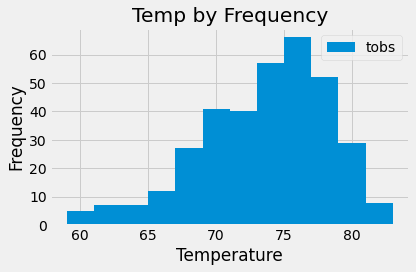

In [38]:
fig, ax = plt.subplots()
ax.hist(Measurements_df_tobs['tobs'], bins=12, label='tobs')

# Set labels
ax.set_ylabel("Frequency")
ax.set_xlabel("Temperature")
ax.set_title("Temp by Frequency")

# Set legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

fig.tight_layout()
plt.show()

-----

## Bonus: Bonus Challenge Assignment

* The following are optional challenge queries. These are highly recommended to attempt, but not required for the homework.

### Temperature Analysis I

* Hawaii is reputed to enjoy mild weather all year. Is there a meaningful difference between the temperature in, for example, June and December?

* Using SQLAlchemy to perform this portion.

* **Identify the average temperature in June at all stations across all available years in the dataset. Do the same for December temperature.**

* Use the t-test to determine whether the difference in the means, if any, is statistically significant. Will you use a paired t-test, or an unpaired t-test? Why?


In [39]:
# June Averages
sel = [Measurement.station, 
       func.avg(Measurement.tobs)]
june_avgs = (session.query(*sel)
    .filter(func.strftime("%m", Measurement.date) == "06")
    .group_by(Measurement.station)
    .order_by(Measurement.station.desc()).all())
june_avgs

[('USC00519523', 76.66810344827586),
 ('USC00519397', 77.55932203389831),
 ('USC00519281', 73.27118644067797),
 ('USC00518838', 73.39473684210526),
 ('USC00517948', 76.6554054054054),
 ('USC00516128', 71.9372197309417),
 ('USC00514830', 76.00537634408602),
 ('USC00513117', 74.05084745762711),
 ('USC00511918', 74.13939393939394)]

In [40]:
# December Averages
sel = [Measurement.station, 
       func.avg(Measurement.tobs)]
dec_avgs = (session.query(*sel)
    .filter(func.strftime("%m", Measurement.date) == "12")
    .group_by(Measurement.station)
    .order_by(Measurement.station.desc()).all())
dec_avgs

[('USC00519523', 72.43333333333334),
 ('USC00519397', 71.10952380952381),
 ('USC00519281', 69.90322580645162),
 ('USC00518838', 72.42105263157895),
 ('USC00517948', 71.8348623853211),
 ('USC00516128', 69.29126213592232),
 ('USC00514830', 73.2247191011236),
 ('USC00513117', 71.06944444444444),
 ('USC00511918', 69.6842105263158)]

Make df to get stuctured arrays for t-test

In [41]:
june_avg_df = pd.DataFrame(june_avgs, columns=['station','June_Avg'])
dec_avg_df = pd.DataFrame(dec_avgs, columns=['station','Dec_Avg'])

In [42]:
june_avg_df

,station,June_Avg
0,USC00519523,76.668103
1,USC00519397,77.559322
2,USC00519281,73.271186
3,USC00518838,73.394737
4,USC00517948,76.655405
5,USC00516128,71.937220
6,USC00514830,76.005376
7,USC00513117,74.050847
8,USC00511918,74.139394


In [43]:
dec_avg_df

,station,Dec_Avg
0,USC00519523,72.433333
1,USC00519397,71.109524
2,USC00519281,69.903226
3,USC00518838,72.421053
4,USC00517948,71.834862
5,USC00516128,69.291262
6,USC00514830,73.224719
7,USC00513117,71.069444
8,USC00511918,69.684211


In [44]:
june_avg_df.June_Avg.mean()

74.85351018249018

In [45]:
dec_avg_df.Dec_Avg.mean()

71.21907046377945

In [46]:
# Paired t-test
stats.ttest_ind(june_avg_df.June_Avg, dec_avg_df.Dec_Avg, equal_var=False)

Ttest_indResult(statistic=4.615865424404701, pvalue=0.0003657335214469917)

**Reject the null hypothesis of equal averages due to P-Value being .0003**

In [47]:
# Generate some fake data to test with
def gendata(loc1=0, loc2=0):
    population1 = june_avg_df.June_Avg
    population2 = dec_avg_df.Dec_Avg

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1, label="June Avg")
    plt.scatter(range(len(population2)), population2, label="Dec Avg")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 10, density=True, alpha=0.7, label="June Avg")
    plt.hist(population2, 10, density=True, alpha=0.7, label="Dec Avg")
    plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population1, population2

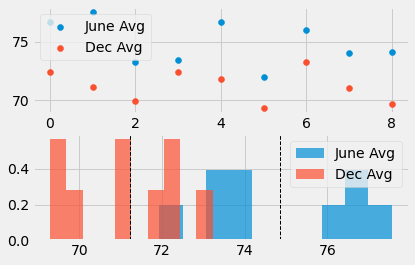

In [48]:
# Generate some data and show the scatter plot
population1, population2 = gendata()

----

### Temperature Analysis II

In [49]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
# print(calc_temps('2012-02-28', '2012-03-05'))

In [50]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2016-08-18', '2017-08-18'))
calc_temps_12_month = calc_temps('2016-08-18', '2017-08-18')

[(58.0, 74.59875167186803, 87.0)]


-----

### Plot the results from your previous query as a bar chart. 
* Use "Trip Avg Temp" as your Title
* Use the average temperature for the y value
* Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

In [51]:
calc_temps_12_month[0][2]

87.0

#### **Plot the results from your previous query as a bar chart.** 

In [52]:
temps_std = np.std(calc_temps_12_month)
temps_std

11.88046724277729

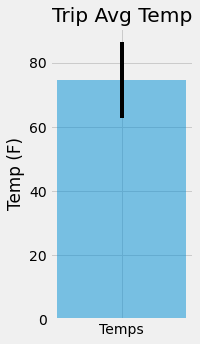

In [53]:
# Build the plot
fig, ax = plt.subplots(figsize=(3,5))

ax.bar('Temps', 
        height=74.5987,
        yerr=temps_std,
       alpha=0.5
       )

ax.set_ylabel('Temp (F)')
ax.set_title('Trip Avg Temp')
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

------

**Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.**<br/>

**Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation.**

In [54]:
tcol = [Measurement.date, Measurement.station, Station.name, func.sum(Measurement.prcp), Station.latitude, Station.longitude, Station.elevation]

total_amount_rainfall_1yr_df = (session.query(*tcol)
                         .filter(Measurement.station == Station.station)
                         .filter(Measurement.date > '2016-08-18')
                         .group_by(Measurement.station)
                          .order_by(func.sum(Measurement.prcp))).statement

total_amount_rainfall_1yr_ago = (session.query(*tcol)
                         .filter(Measurement.station == Station.station)
                         .filter(Measurement.date > '2016-08-18')
                         .group_by(Measurement.station)
                          .order_by(func.sum(Measurement.prcp).desc())
                         .all())

total_amount_rainfall_1yr_ago

[('2016-08-19',
  'USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  152.59000000000006,
  21.3331,
  -157.8025,
  152.4),
 ('2016-08-19',
  'USC00519281',
  'WAIHEE 837.5, HI US',
  72.87,
  21.45167,
  -157.84888999999998,
  32.9),
 ('2016-08-19',
  'USC00513117',
  'KANEOHE 838.1, HI US',
  49.94000000000003,
  21.4234,
  -157.8015,
  14.6),
 ('2016-08-19',
  'USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  38.82,
  21.33556,
  -157.71139,
  19.5),
 ('2016-08-19',
  'USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  33.309999999999995,
  21.5213,
  -157.8374,
  7.0),
 ('2016-08-19',
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  16.64999999999999,
  21.2716,
  -157.8168,
  3.0),
 ('2016-08-22',
  'USC00517948',
  'PEARL CITY, HI US',
  4.59,
  21.3934,
  -157.9751,
  11.9)]

In [55]:
tcol = [Measurement.date, Measurement.station, Station.name, func.sum(Measurement.prcp), Station.latitude, Station.longitude, Station.elevation]

total_amount_rainfall_2yr_ago_df = (session.query(*tcol)
            .filter(Measurement.station == Station.station)
            .filter(Measurement.date > '2015-08-17')                        
            .filter(Measurement.date < '2016-08-17')                   
            
            .group_by(Measurement.station)
            .order_by(func.sum(Measurement.prcp))).statement

total_amount_rainfall_2yr_ago = (session.query(*tcol)
            .filter(Measurement.station == Station.station)
            .filter(Measurement.date < '2016-08-17')                   
            .filter(Measurement.date > '2015-08-17')
            .group_by(Measurement.station)
            .order_by(func.sum(Measurement.prcp).desc())
            .all())

total_amount_rainfall_2yr_ago

[('2015-08-18',
  'USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  174.05999999999992,
  21.3331,
  -157.8025,
  152.4),
 ('2015-08-18',
  'USC00519281',
  'WAIHEE 837.5, HI US',
  106.19000000000008,
  21.45167,
  -157.84888999999998,
  32.9),
 ('2015-08-18',
  'USC00513117',
  'KANEOHE 838.1, HI US',
  72.05,
  21.4234,
  -157.8015,
  14.6),
 ('2015-08-18',
  'USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  57.360000000000014,
  21.33556,
  -157.71139,
  19.5),
 ('2015-08-18',
  'USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  43.25000000000001,
  21.5213,
  -157.8374,
  7.0),
 ('2015-08-18',
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  23.3,
  21.2716,
  -157.8168,
  3.0),
 ('2015-08-18',
  'USC00517948',
  'PEARL CITY, HI US',
  4.5600000000000005,
  21.3934,
  -157.9751,
  11.9),
 ('2015-08-19',
  'USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  4.05,
  21.3152,
  -157.9992,
  0.9),
 ('2015-09-21',
  'USC00518838',
  'UPPER WAHIAWA 874.3, HI US',
  0.0

In [56]:
rainfall_15_16_df = pd.read_sql_query(total_amount_rainfall_2yr_ago_df, session.bind)

In [57]:
rainfall_15_16_df

,date,station,name,sum_1,latitude,longitude,elevation
0,2015-09-21,USC00518838,"UPPER WAHIAWA 874.3, HI US",0.00,21.49920,-158.01110,306.6
1,2015-08-19,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",4.05,21.31520,-157.99920,0.9
2,2015-08-18,USC00517948,"PEARL CITY, HI US",4.56,21.39340,-157.97510,11.9
3,2015-08-18,USC00519397,"WAIKIKI 717.2, HI US",23.30,21.27160,-157.81680,3.0
4,2015-08-18,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",43.25,21.52130,-157.83740,7.0
5,2015-08-18,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",57.36,21.33556,-157.71139,19.5
6,2015-08-18,USC00513117,"KANEOHE 838.1, HI US",72.05,21.42340,-157.80150,14.6
7,2015-08-18,USC00519281,"WAIHEE 837.5, HI US",106.19,21.45167,-157.84889,32.9
8,2015-08-18,USC00516128,"MANOA LYON ARBO 785.2, HI US",174.06,21.33310,-157.80250,152.4


In [58]:
rainfall_16_17_df = pd.read_sql_query(total_amount_rainfall_1yr_df, session.bind)
rainfall_16_17_df

,date,station,name,sum_1,latitude,longitude,elevation
0,2016-08-22,USC00517948,"PEARL CITY, HI US",4.59,21.39340,-157.97510,11.9
1,2016-08-19,USC00519397,"WAIKIKI 717.2, HI US",16.65,21.27160,-157.81680,3.0
2,2016-08-19,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",33.31,21.52130,-157.83740,7.0
3,2016-08-19,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",38.82,21.33556,-157.71139,19.5
4,2016-08-19,USC00513117,"KANEOHE 838.1, HI US",49.94,21.42340,-157.80150,14.6
5,2016-08-19,USC00519281,"WAIHEE 837.5, HI US",72.87,21.45167,-157.84889,32.9
6,2016-08-19,USC00516128,"MANOA LYON ARBO 785.2, HI US",152.59,21.33310,-157.80250,152.4


#### **Daily Norms**: 2015-2016 & 2016-2017

In [59]:
daily_norm_16_17 = calc_temps('2016-08-18', '2017-08-18')
daily_norm_15_16 = calc_temps('2015-08-18', '2016-08-18')

In [60]:
daily_norm_15_16

[(56.0, 74.45643858903527, 86.0)]

In [61]:
daily_norm_16_17

[(58.0, 74.59875167186803, 87.0)]

----

#### **Daily Norms for specific range**: 08-18 through 08-22

In [62]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [Measurement.date, func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%Y-%m-%d", Measurement.date) == date).all()
    
daily_normals("2017-08-09")

[('2017-08-09', 71.0, 77.33333333333333, 81.0)]

**Set the start and end date of the trip**

In [63]:
# Set the start and end date of the trip
# Use the start and end date to create a range of dates
# Set end of vacation in datetime format
vacation_end_date = dt.date(2017, 8, 9)


# Number of days for vacation. Will be subtracked from end date
numdays = 9
# setup base
base = dt.datetime.today()
# Create list of dates, in datetime format
date_list = [vacation_end_date - dt.timedelta(days=x) for x in range(numdays)]

**Calculate the daily normals for your trip**

push each tuple of calculations into a list called `normals`.<br/>
Loop through the list of %Y-%m-%d strings and calculate the normals for each date

In [64]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Loop through the list of %Y-%m-%d strings and calculate the normals for each date
normals = []
for date in date_list:
    normals.append(daily_normals(date))

In [65]:
normals

[[('2017-08-09', 71.0, 77.33333333333333, 81.0)],
 [('2017-08-08', 74.0, 78.5, 82.0)],
 [('2017-08-07', 78.0, 80.5, 83.0)],
 [('2017-08-06', 79.0, 81.4, 83.0)],
 [('2017-08-05', 77.0, 80.0, 82.0)],
 [('2017-08-04', 77.0, 80.0, 82.0)],
 [('2017-08-03', 76.0, 79.0, 81.0)],
 [('2017-08-02', 73.0, 79.0, 83.0)],
 [('2017-08-01', 72.0, 74.5, 77.0)]]

**Strip off the year and save a list of %m-%d strings**

In [66]:
# KEEPING YEAR TO VERIFY CORRECT YEAR DATA HAS BEEN RECEIVED
# Stip off the year and save a list of %m-%d strings
# Loop through date_list and remove year. Keeping format (Month-Day)

# clean_date_list = []
# for date in normals:
#     edit_date = date.strftime("%m-%d")
#     clean_date_list.append(edit_date)

**Create DataFrame with results**

In [67]:
# Create dataframe with values. Reset index. Set 'Date' as index
daily_norm_df = pd.DataFrame(np.concatenate(normals),columns=['Date','Min','Avg','Max']).reset_index(drop=True).set_index('Date')
# Convert values to INT
daily_norm_df = daily_norm_df.apply(pd.to_numeric)
# Sort by ascending
daily_norm_df = daily_norm_df.sort_index(axis=0, ascending=True)
daily_norm_df

,Min,Avg,Max
Date,,,
2017-08-01,72.0,74.500000,77.0
2017-08-02,73.0,79.000000,83.0
2017-08-03,76.0,79.000000,81.0
2017-08-04,77.0,80.000000,82.0
2017-08-05,77.0,80.000000,82.0
2017-08-06,79.0,81.400000,83.0
2017-08-07,78.0,80.500000,83.0
2017-08-08,74.0,78.500000,82.0
2017-08-09,71.0,77.333333,81.0


**Plot the daily normals**

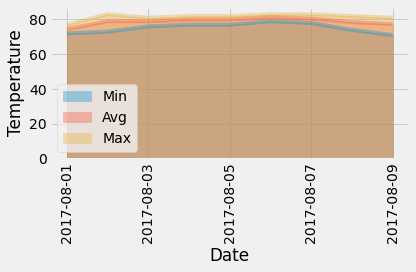

In [68]:
# Plot the daily normals as an area plot with `stacked=False`
daily_norm_df.plot.area(stacked=False, alpha=0.35)

# Rotate xlabel text
plt.xticks(rotation=90)
# Label Y axis
plt.ylabel('Temperature')

plt.grid(True)
plt.tight_layout()
plt.show()